


$ H = - \frac{d^2}{dx^2} + V_0 \exp{(-x^2)}$


$H\Psi = E\Psi$

Задачи:
- Исследовать зависимость вычислительных затрат от числа точек сетки, в вычислении энергии основного состояния системы, при помощи простых итераций сосдвигом.


In [1]:
from tokenize import Double
import numpy as np
import time
from scipy.sparse import diags
from scipy.linalg import eigh_tridiagonal
from scipy.linalg import eig
from matplotlib import pyplot as plt


def getPotentialValue(x: np.double, v_0: np.double) -> np.double:
    return (-1) * v_0 * np.exp(-1 * (x * x), dtype=np.double)

def makeDiffMatrix(n: int, R: np.double, v_0: np.double) -> np.ndarray:
    delta = 2*R / (n-1)
    diagonal = np.zeros(n, dtype=np.double)
    subDiagonal = np.ones(n-1, dtype=np.double) * (-1) / (delta * delta)
    
    xs = np.linspace(-R, R, n, dtype=np.double)
    
    for i in range(n):
        diagonal[i] = 2 / (delta * delta) + getPotentialValue(xs[i], v_0)

    # return diags([diagonal, subDiagonal, subDiagonal], [0, -1, 1])  
    return (diagonal, subDiagonal)




Done for N = 10
Done for N = 20
Done for N = 30
Done for N = 50
Done for N = 70
Done for N = 100
Done for N = 150


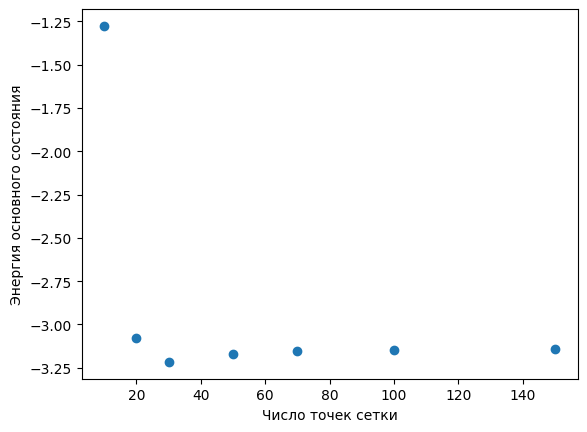

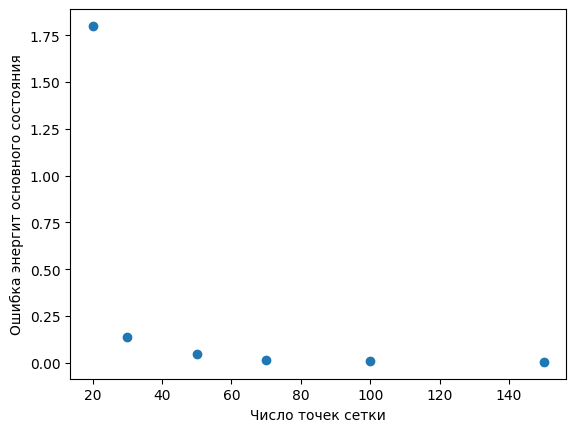

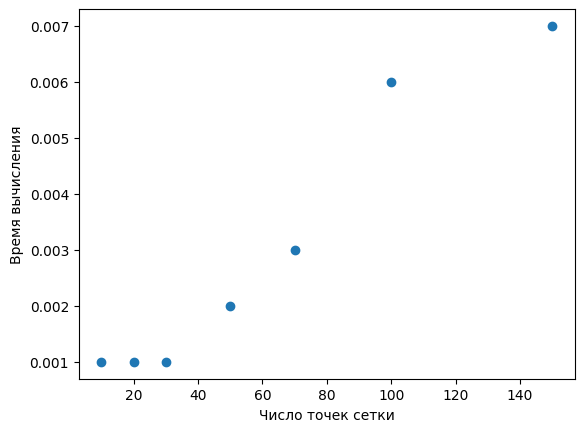

In [2]:
numberOfPoints = [10, 20, 30,  50, 70, 100, 150,]# 200, 300, 500, 700, 1000, 1200, 1500, 1750, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,]
energies = []
timeConsumed = []
iterLimit = 100000000
boxBorder = 10
potential = 5


for nDots in numberOfPoints:
    start_time = time.time()
    (diag, subdiag) = makeDiffMatrix(nDots, boxBorder, potential)
    sparseMatrix = diags([diag, subdiag, subdiag], [0, 1, -1], dtype=np.double)
    # w, v = eigh_tridiagonal(diag, subdiag, select='v', select_range=(-1000, 0))
    # print(potential, " :  ", w)#[:5])

    # Оценка максимального собственного числа
    prevE = 1000.0
    currE = 0.0
    currVec = np.random.normal(loc=0.0, scale=1, size=nDots)
    currVec = currVec / np.linalg.norm(currVec)
    niter = 0
    while abs(prevE - currE) > 0.0001:# and niter < iterLimit:
        prevE = currE
        currVec = sparseMatrix * currVec
        currE = np.linalg.norm(currVec)
        currVec = currVec / currE
        niter += 1
        # print(niter)
    estimateOfMaxEn = currE
    # print(estimateOfMaxEn)
    
    # Сдвиг и оценка минимального по мордулю собственного числа
    newdiag = np.array([x - (estimateOfMaxEn / 2) for x in diag])
    newSparseMatrix = diags([newdiag, subdiag, subdiag], [0, 1, -1], dtype=np.double)
    # w, v = eigh_tridiagonal(newdiag, subdiag, select='v', select_range=(9970, 10000))
    # print(potential, " :  ", w)#[:5])

    prevE = 1000.0
    currE = 0.0
    currVec = np.random.normal(loc=0.0, scale=1, size=nDots)
    currVec = currVec / np.linalg.norm(currVec)
    niter = 0
    while abs(prevE - currE) > 0.000001:# and niter < iterLimit:
        prevE = currE
        currVec = newSparseMatrix * currVec
        currE = np.linalg.norm(currVec)
        currVec = currVec / currE
        niter += 1
        # print(niter)
    estimateOfMinEn = (-1) * currE + (estimateOfMaxEn / 2)
    res_time = time.time() - start_time

    timeConsumed.append(res_time) 
    energies.append(estimateOfMinEn)
    print("Done for N = {}".format(nDots))
    # print(estimateOfMinEn) 


errorValues = []
for i in range(len(energies) - 1):
    errorValues.append(abs(energies[i] - energies[i+1]))


plt.scatter(numberOfPoints, energies)
# Ns = [2 * np.sqrt(x/ (2 * np.pi)) + 1/2 for x in potentials]
# plt.plot(potentials, Ns, color='r')
plt.xlabel("Число точек сетки")
plt.ylabel("Энергия основного состояния")
plt.show()

plt.scatter(numberOfPoints[1:], errorValues)
# Ns = [2 * np.sqrt(x/ (2 * np.pi)) + 1/2 for x in potentials]
# plt.plot(potentials, Ns, color='r')
plt.xlabel("Число точек сетки")
plt.ylabel("Ошибка энергит основного состояния")
plt.show()

plt.scatter(numberOfPoints, timeConsumed)
# Ns = [2 * np.sqrt(x/ (2 * np.pi)) + 1/2 for x in potentials]
# plt.plot(potentials, Ns, color='r')
plt.xlabel("Число точек сетки")
plt.ylabel("Время вычисления")
plt.show()

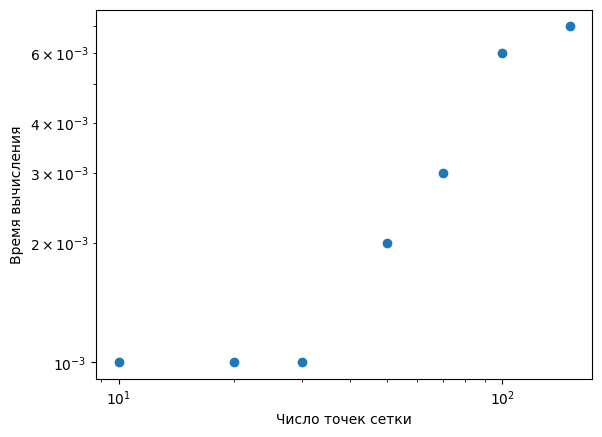

0.9654208174340773


In [3]:
plt.scatter(numberOfPoints, timeConsumed)
# Ns = [2 * np.sqrt(x/ (2 * np.pi)) + 1/2 for x in potentials]
# plt.plot(potentials, Ns, color='r')
plt.xlabel("Число точек сетки")
plt.ylabel("Время вычисления")
plt.yscale('log')
plt.xscale('log')
plt.show()

timesLog = np.log10(timeConsumed)
dotsLog = np.log10(numberOfPoints)

print((timesLog[-1] - timesLog[1])/( dotsLog[-1] - dotsLog[1] ))


In [2]:
numberOfPoints = [20, 30,  50, 70, 100, 150, 200, 300, 500, 700, 1000, 1200, 1500, 1750, 2000, 3000, 4000, 5000,]# 6000, 7000, 8000, 9000, 10000,]
energies = []
timeConsumed = []
iterLimit = 10000
boxBorder = 10
potential = 5
res_vals = []
residueValues = []

hs = []
for n in numberOfPoints:
    hs.append(2 * boxBorder / n)

for nDots in numberOfPoints:
    start_time = time.time()
    (diag, subdiag) = makeDiffMatrix(nDots, boxBorder, potential)
    sparseMatrix = diags([diag, subdiag, subdiag], [0, 1, -1], dtype=np.double)
    # w, v = eigh_tridiagonal(diag, subdiag, select='v', select_range=(-1000, 0))
    # print(potential, " :  ", w)#[:5])

    # Оценка максимального собственного числа
    prevE = 1000.0
    currE = 0.0
    currVec = np.random.normal(loc=0.0, scale=1, size=nDots)
    currVec = currVec / np.linalg.norm(currVec)
    niter = 0
    residueValue = 1000
    while residueValue > 0.01:# and niter < iterLimit:
        prevE = currE
        currVec = sparseMatrix * currVec
        currE = np.linalg.norm(currVec)
        currVec = currVec / currE


        residueVector = sparseMatrix * currVec - currE * currVec
        residueValue = np.linalg.norm(residueVector)
        # res_vals.append(residueValue)
        if nDots == numberOfPoints[-1]:
            residueValues.append(residueValue)

        niter += 1
        # print(niter)
    estimateOfMaxEn = currE
    # print(estimateOfMaxEn)
    
    # plt.plot(*[range(len(res_vals))], res_vals)
    # plt.show()
    # print(res_vals[-10:])
    # aaa

    # Сдвиг и оценка минимального по мордулю собственного числа
    newdiag = np.array([x - (estimateOfMaxEn / 2) for x in diag])
    newSparseMatrix = diags([newdiag, subdiag, subdiag], [0, 1, -1], dtype=np.double)
    # w, v = eigh_tridiagonal(newdiag, subdiag, select='v', select_range=(9970, 10000))


    prevE = 1000.0
    currE = 0.0
    currVec = np.random.normal(loc=0.0, scale=1, size=nDots)
    currVec = currVec / np.linalg.norm(currVec)
    niter = 0
    residueValue = 1000
    while residueValue > 0.0001:# and niter < iterLimit:
        prevE = currE
        currVec = newSparseMatrix * currVec
        currE = np.linalg.norm(currVec)
        currVec = currVec / currE

        residueVector = newSparseMatrix * currVec + currE * currVec
        residueValue = np.linalg.norm(residueVector)
        # res_vals.append(residueValue)

        niter += 1
        # print(niter)
    estimateOfMinEn = (-1) * currE + (estimateOfMaxEn / 2)
    res_time = time.time() - start_time

    timeConsumed.append(res_time) 
    energies.append(estimateOfMinEn)
    print("Done for N = {}".format(nDots))
    # print(estimateOfMinEn) 

print("E = {:.8f} ".format(estimateOfMinEn))

errorValues = []
for i in range(len(energies) - 1):
    errorValues.append(abs(energies[i] - energies[i+1]))


# plt.scatter(numberOfPoints, residueValues)
# plt.xlabel("Итерация")
# plt.ylabel("Невязка")
# plt.title("Схождение невязки при N = 5000")
# plt.show()

# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
# axes[0].scatter(numberOfPoints, energies)
# axes[0].set_xlabel("Число точек сетки")
# axes[0].set_ylabel("Энергия основного состояния")
# axes[1].scatter(hs, energies)
# axes[1].set_xlabel("Шаг сетки")
# axes[1].set_ylabel("Энергия основного состояния")
# plt.show()

# # plt.scatter(numberOfPoints[1:], errorValues)
# # plt.xlabel("Число точек сетки")
# # plt.ylabel("Ошибка энергит основного состояния")
# # plt.show()

# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
# axes[0].scatter(numberOfPoints, timeConsumed)
# axes[0].set_xlabel("Число точек сетки")
# axes[0].set_ylabel("Время вычисления")
# axes[1].scatter(hs, timeConsumed)
# axes[1].set_xlabel("Шаг сетки")
# axes[1].set_ylabel("Время вычисления")
# plt.show()

Done for N = 20
Done for N = 30
Done for N = 50
Done for N = 70
Done for N = 100
Done for N = 150
Done for N = 200
Done for N = 300
Done for N = 500
Done for N = 700
Done for N = 1000
Done for N = 1200
Done for N = 1500
Done for N = 1750
Done for N = 2000
Done for N = 3000
Done for N = 4000
Done for N = 5000
E = -3.14033664 


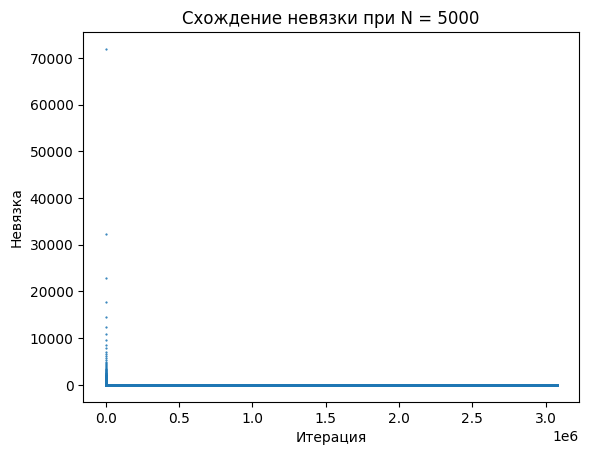

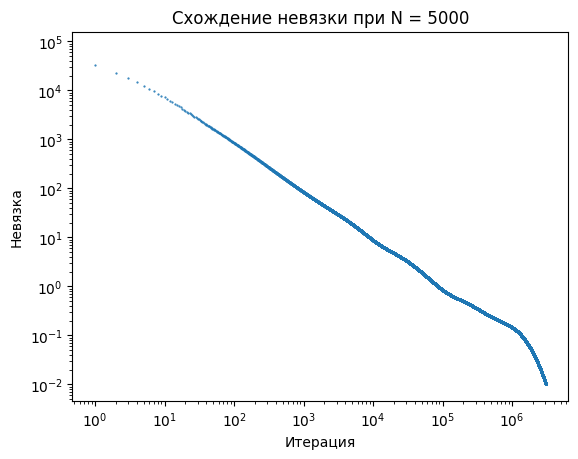

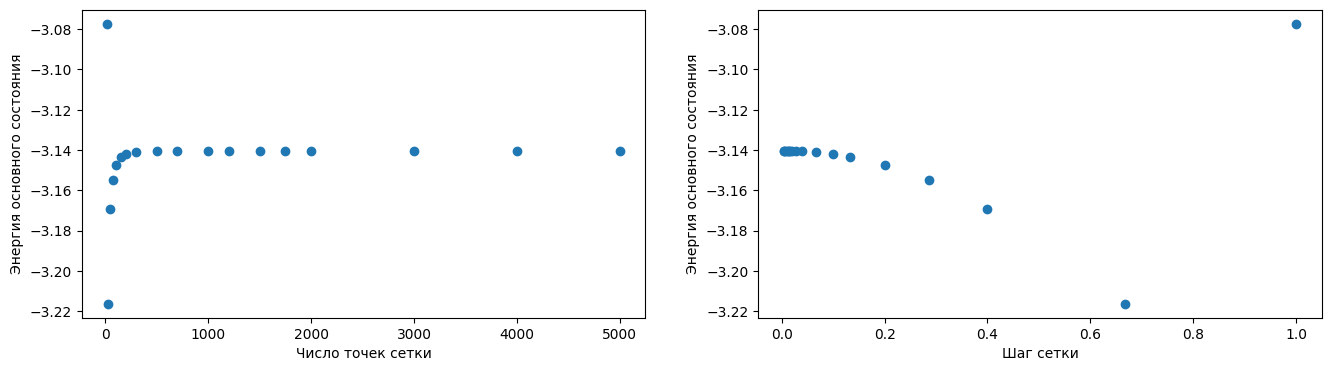

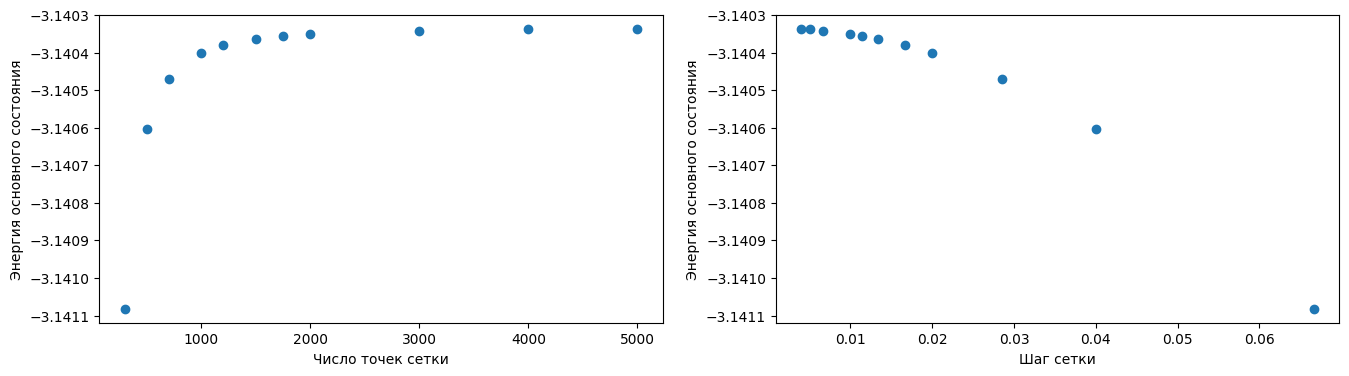

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

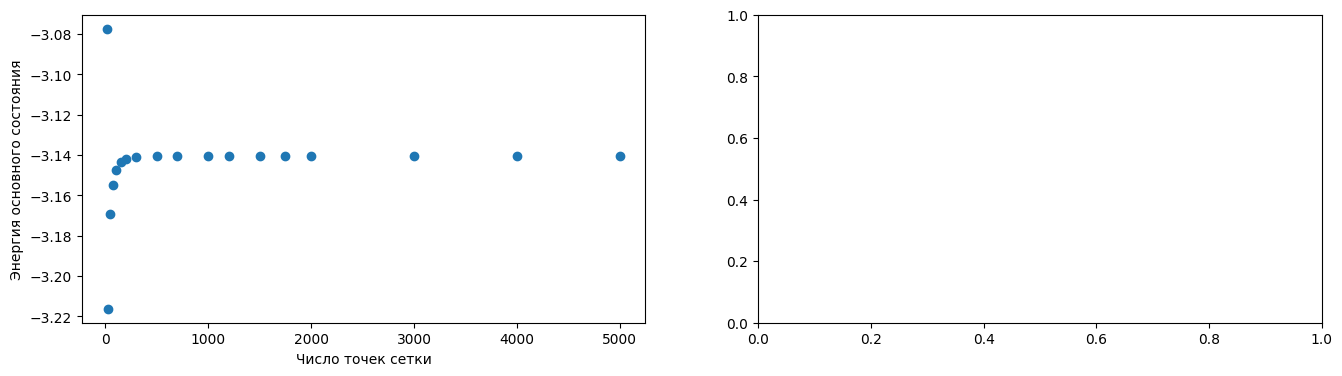

In [3]:

plt.scatter([*range(len(residueValues))], residueValues, s=0.3)
plt.xlabel("Итерация")
plt.ylabel("Невязка")
plt.title("Схождение невязки при N = 5000")
plt.show()

plt.scatter([*range(len(residueValues))], residueValues, s=0.3)
plt.xlabel("Итерация")
plt.ylabel("Невязка")
plt.yscale('log')
plt.xscale('log')
plt.title("Схождение невязки при N = 5000")
plt.show()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
axes[0].scatter(numberOfPoints, energies)
axes[0].set_xlabel("Число точек сетки")
axes[0].set_ylabel("Энергия основного состояния")
axes[1].scatter(hs, energies)
axes[1].set_xlabel("Шаг сетки")
axes[1].set_ylabel("Энергия основного состояния")
plt.show()


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
axes[0].scatter(numberOfPoints[7:], energies[7:])
axes[0].set_xlabel("Число точек сетки")
axes[0].set_ylabel("Энергия основного состояния")
axes[1].scatter(hs[7:], energies[7:])
axes[1].set_xlabel("Шаг сетки")
axes[1].set_ylabel("Энергия основного состояния")
plt.show()


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
axes[0].scatter(numberOfPoints, energies)
axes[0].set_xlabel("Число точек сетки")
axes[0].set_ylabel("Энергия основного состояния")
axes[1].scatter(hs**2, energies)
axes[1].set_xlabel("Шаг сетки в квадрате")
axes[1].set_ylabel("Энергия основного состояния")
plt.show()

# plt.scatter(numberOfPoints[1:], errorValues)
# plt.xlabel("Число точек сетки")
# plt.ylabel("Ошибка энергит основного состояния")
# plt.show()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
axes[0].scatter(numberOfPoints, timeConsumed)
axes[0].set_xlabel("Число точек сетки")
axes[0].set_ylabel("Время вычисления")
axes[1].scatter(hs, timeConsumed)
axes[1].set_xlabel("Шаг сетки")
axes[1].set_ylabel("Время вычисления")
plt.show()

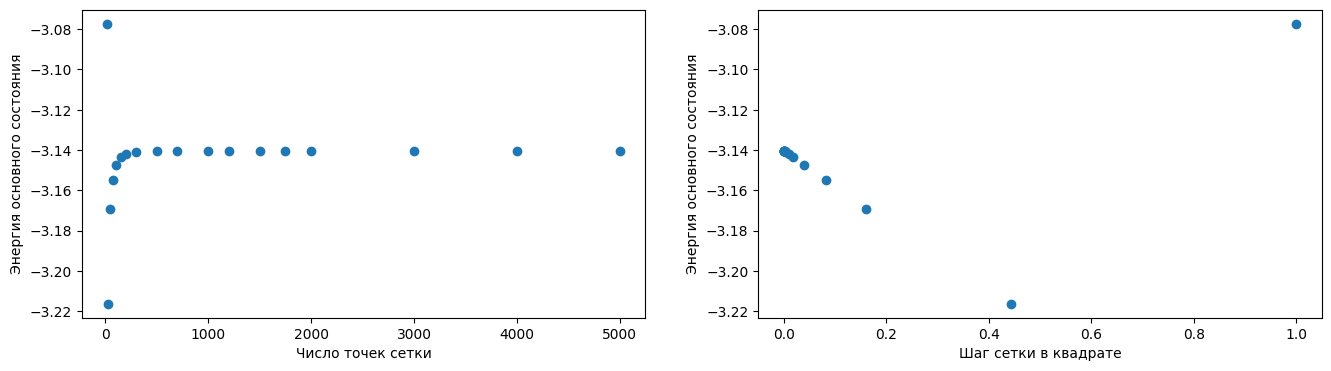

In [4]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
axes[0].scatter(numberOfPoints, energies)
axes[0].set_xlabel("Число точек сетки")
axes[0].set_ylabel("Энергия основного состояния")
axes[1].scatter(np.power(hs, 2), energies)
axes[1].set_xlabel("Шаг сетки в квадрате")
axes[1].set_ylabel("Энергия основного состояния")
plt.show()

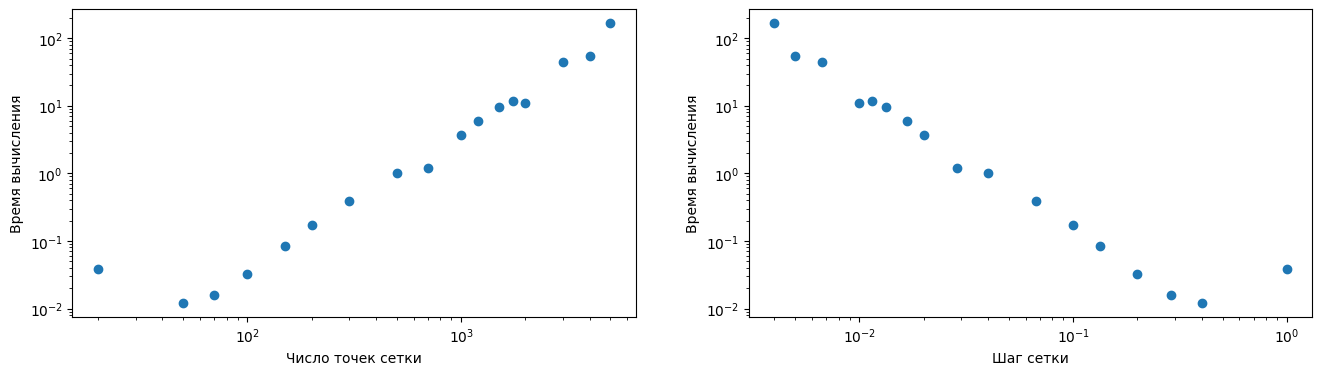

2.0716636833211908


C:\Users\kiril\AppData\Local\Temp\ipykernel_12164\2766330984.py:14: RuntimeWarning: divide by zero encountered in log10
  timesLog = np.log10(timeConsumed)


In [6]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
axes[0].scatter(numberOfPoints, timeConsumed)
axes[0].set_xlabel("Число точек сетки")
axes[0].set_ylabel("Время вычисления")
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].scatter(hs, timeConsumed)
axes[1].set_xlabel("Шаг сетки")
axes[1].set_ylabel("Время вычисления")
axes[1].set_xscale('log')
axes[1].set_yscale('log')
plt.show()

timesLog = np.log10(timeConsumed)
dotsLog = np.log10(numberOfPoints)

print((timesLog[-1] - timesLog[2])/( dotsLog[-1] - dotsLog[2] ))